In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly import tools
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from string import ascii_letters
from scipy.stats import norm,skew
from scipy.stats.stats import pearsonr
from scipy import stats
pl.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('H1N1_Flu_Vaccines.csv')
pd.set_option('display.max_columns',None)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
original_df=df.copy()


In [4]:
charge_dist=df['h1n1_vaccine'].values

logcharge=np.log(df['h1n1_vaccine'])


C:\Users\rissu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



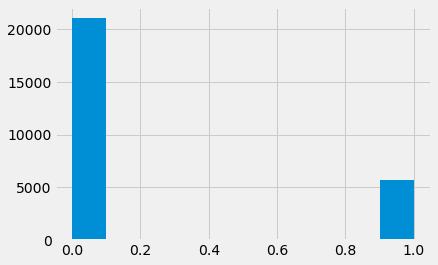

In [5]:
pl.hist(charge_dist)
pl.show()

In [6]:
trace0=go.Histogram(x=charge_dist,
                   histnorm='probability',
                   name='H1N1 Vaccine Distribution',
                   marker=dict(color='#FA5858'))

trace1=go.Histogram(x=logcharge,
                   histnorm='probability',
                   name='H1N1 Vaccine distribution using Log',
                   marker={'color':'#58FA82'})

fig=tools.make_subplots(rows=1,cols=2,subplot_titles=('H1N1 Vaccine Distribution',
                                                      'Log H1N1 Vaccine Distribution'),
                                                       print_grid=False
                                                       )
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.update_layout(showlegend=True,title='H1N1 Vaccine distributions',
                 bargap=0.05,legend=dict(
    yanchor="bottom",
    xanchor="center",
    x=0.5,y=0.9
)
                 )

# fig.show()
iplot(fig,filename='custom_subplots')

C:\Users\rissu\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [12]:
seasonal_vacc=df['seasonal_vaccine'].values
logcharge=np.log(df['seasonal_vaccine'])

trace0=go.Histogram(x=seasonal_vacc,histnorm='probability',name='Seasonal Vaccine Distribution')

trace1=go.Histogram(x=logcharge,histnorm='probability',
                   name='Log Seasonal Vaccine Distribution')

fig=tools.make_subplots(rows=2,cols=1,
                       subplot_titles=('Sesonal Vaccine Distribution',
                                      'Log Seasonal Vaccine Distribution'))
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,2,1)
fig.update_layout(bargap=0.1)
fig.show()





In [20]:
#List of catgorical values
cat_vals=df.dtypes[df.dtypes=='object']
cat_vals

age_group                object
education                object
race                     object
sex                      object
income_poverty           object
marital_status           object
rent_or_own              object
employment_status        object
hhs_geo_region           object
census_msa               object
employment_industry      object
employment_occupation    object
dtype: object

In [27]:
df[cat_vals.keys()].isnull().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

In [28]:
for feature in cat_vals.keys():
    df[feature]=df[feature].fillna('None')
    

In [32]:
numeric_vals=df.dtypes[df.dtypes!='object']
numeric_vals

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
h1n1_vaccine                     int64
seasonal_vaccine         

In [34]:
df[numeric_vals.keys()].isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [35]:
for feature in numeric_vals.keys():
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)


In [38]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [40]:
chronic=[df['chronic_med_condition'].values.tolist()]
group_labels=['Chronic Medical Condition Distribution']
colors=['']